In [17]:
#! importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [18]:
df = pd.read_csv('ProccessedData.csv')
df.head()
df['Type of crime'].value_counts()
df.head()

,Type of crime,Date of Offend,Off.Name,Off.age,Off.gender,crime description,crime Location,Name of victim,Victim Gender,Victim Age,Conclusion,Link/source,lat,long,Time_of_Day,Location_Type,Weather_Conditions
0,Theft,04-08-2023,Dilip Chavan,36,M,Stolen valuables worth Rs 47 lakh from bank lo...,"18.9492076,72.8001957","Two victims (one female, aged 28 and one male,...",M,20,Bank officer arrested for stealing valuables u...,<https://timesofindia.indiatimes.com/city/mumb...,18.949208,72.800196,Evening,Commercial,Rainy
1,Theft,1990-NA-NA,Vishwanath alias Bala Pawar,27,M,Accused hid for 32 years after being declared ...,"19.2967731,72.8599784",Unknown,M,31,Runaway robbery accused traced and arrested af...,<https://timesofindia.indiatimes.com/city/mumb...,19.296773,72.859978,Night,Commercial,Sunny
2,Theft,24-05-2023,Unknown,34,M,Detained for robbery and vehicle thefts,"18.6010921,73.7641245",19-year-old mechanic,M,31,Minor admitted involvement in thefts and was s...,<https://timesofindia.indiatimes.com/city/pune...,18.601092,73.764124,Evening,Commercial,Sunny
3,Robbery,01-07-2023,Unknown,37,M,"Teen bundled into auto, mugged by 3","19.0790239,72.9080122",Class 12th student,M,22,Triple robbery at gunpoint,<https://timesofindia.indiatimes.com/city/mumb...,19.079024,72.908012,Night,Commercial,Cloudy
4,Other,11-12-2022,"Lateef Shaikh, Radhhe Bhola Shaw",22,M,Rs 10 lakh burglary of wedding jewellery,"19.0759837,72.8776559",Unknown,M,38,Police arrested two suspects and recovered 90%...,<https://timesofindia.indiatimes.com/city/mumb...,19.075984,72.877656,Morning,Residential,Rainy


In [19]:
# df = df.drop(columns=['Date of Offend','Off.Name','crime description','Name of victim','Conclusion','Link/source'])
# df.head()
# df.fillna('NA')
df.isnull().sum()

Type of crime         0
Date of Offend        0
Off.Name              0
Off.age               0
Off.gender            0
crime description     1
crime Location        0
Name of victim        0
Victim Gender         0
Victim Age            0
Conclusion            0
Link/source           0
lat                   0
long                  0
Time_of_Day           0
Location_Type         0
Weather_Conditions    0
dtype: int64

In [20]:
for i, location in enumerate(df['crime Location']):
    print(location.split(",")[0],isinstance(location.split(",")[0],str))
    try:
        if location == "NA":
            df.at[i, 'crime Location'] = '0.0,0.0'
            continue
        if len(location.split(",")) == 1:
            df.at[i, 'crime Location'] = '0.0,0.0'
        if len(location.split(",")) == 2:
            if not '.' in location.split(",")[0] or not '.' in location.split(",")[1]:
                df.at[i, 'crime Location'] = '0.0,0.0'
    except:
        print(i)
        df.at[i, 'crime Location'] = '0.0,0.0'

# After replacing "NA" and single values with '0.0,0.0', split the "crime Location" column into two new columns "lat" and "long"
df[['lat', 'long']] = df['crime Location'].str.split(',', expand=True).astype(float)

18.9492076 True
19.2967731 True
18.6010921 True
19.0790239 True
19.0759837 True
19.2782752 True
23.022505 True
18.9487467 True
0.0 True
17.4428794 True
19.4198627 True
19.0843377 True
19.9628625 True
18.9863844 True
19.2297814 True
19.2215115 True
18.9102069 True
19.0586788 True
19.2183307 True
19.0180718 True
28.6691565 True
19.1874459 True
19.1075424 True
19.7968929 True
18.9675954 True
19.1435322 True
19.0759837 True
15.2993265 True
41.0545935 True
18.9067031 True
19.1538231 True
19.1178548 True
22.48077 True
15.2677367 True
19.0641325 True
19.4302534 True
19.9974533 True
19.0595596 True
15.2832187 True
19.0380334 True
18.9126831 True
19.1874459 True
22.6708317 True
28.6549795 True
19.2952325 True
28.7040592 True
19.033328 True
61.52401 True
19.236249 True
0.0 True
22.48077 True
19.1350852 True
19.0744857 True
19.0208512 True
19.1662566 True
23.2599333 True
19.0759837 True
19.1858157 True
19.0744857 True
19.1253629 True
19.0759837 True
19.1260399 True
23.7609139 True
19.2155918 True

In [21]:
df.head()

,Type of crime,Date of Offend,Off.Name,Off.age,Off.gender,crime description,crime Location,Name of victim,Victim Gender,Victim Age,Conclusion,Link/source,lat,long,Time_of_Day,Location_Type,Weather_Conditions
0,Theft,04-08-2023,Dilip Chavan,36,M,Stolen valuables worth Rs 47 lakh from bank lo...,"18.9492076,72.8001957","Two victims (one female, aged 28 and one male,...",M,20,Bank officer arrested for stealing valuables u...,<https://timesofindia.indiatimes.com/city/mumb...,18.949208,72.800196,Evening,Commercial,Rainy
1,Theft,1990-NA-NA,Vishwanath alias Bala Pawar,27,M,Accused hid for 32 years after being declared ...,"19.2967731,72.8599784",Unknown,M,31,Runaway robbery accused traced and arrested af...,<https://timesofindia.indiatimes.com/city/mumb...,19.296773,72.859978,Night,Commercial,Sunny
2,Theft,24-05-2023,Unknown,34,M,Detained for robbery and vehicle thefts,"18.6010921,73.7641245",19-year-old mechanic,M,31,Minor admitted involvement in thefts and was s...,<https://timesofindia.indiatimes.com/city/pune...,18.601092,73.764124,Evening,Commercial,Sunny
3,Robbery,01-07-2023,Unknown,37,M,"Teen bundled into auto, mugged by 3","19.0790239,72.9080122",Class 12th student,M,22,Triple robbery at gunpoint,<https://timesofindia.indiatimes.com/city/mumb...,19.079024,72.908012,Night,Commercial,Cloudy
4,Other,11-12-2022,"Lateef Shaikh, Radhhe Bhola Shaw",22,M,Rs 10 lakh burglary of wedding jewellery,"19.0759837,72.8776559",Unknown,M,38,Police arrested two suspects and recovered 90%...,<https://timesofindia.indiatimes.com/city/mumb...,19.075984,72.877656,Morning,Residential,Rainy


In [22]:
df.shape

(582, 17)

In [23]:
df.isnull().sum()

Type of crime         0
Date of Offend        0
Off.Name              0
Off.age               0
Off.gender            0
crime description     1
crime Location        0
Name of victim        0
Victim Gender         0
Victim Age            0
Conclusion            0
Link/source           0
lat                   0
long                  0
Time_of_Day           0
Location_Type         0
Weather_Conditions    0
dtype: int64

In [24]:
df['Type of crime'].value_counts()

Murder               177
Theft                129
Other                115
Sexual Harassment     70
Kidnapping            48
Robbery               43
Name: Type of crime, dtype: int64

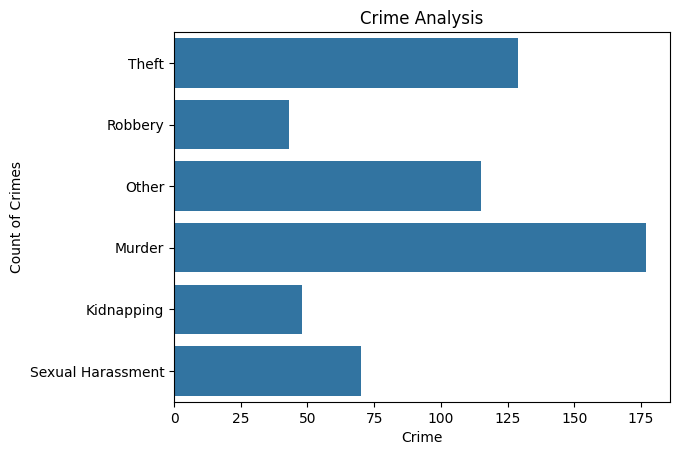

In [25]:
sns.countplot(df['Type of crime'])
plt.xlabel("Crime")
plt.ylabel("Count of Crimes")
plt.title("Crime Analysis")
plt.show()

In [26]:
df['Date of Offend'] = pd.to_datetime(df['Date of Offend'], errors='coerce')

def replace_invalid_dates(date):
  if pd.isna(date) or not pd.to_datetime(date, errors='coerce'):
    return pd.to_datetime('01-01-2024')
  else:
    return date

# Apply the function to 'Date of Offend' column using vectorized apply
df['Date of Offend'] = df['Date of Offend'].apply(replace_invalid_dates)

print(df)

    Type of crime Date of Offend                              Off.Name  \
0           Theft     2023-04-08                          Dilip Chavan   
1           Theft     2024-01-01           Vishwanath alias Bala Pawar   
2           Theft     2023-05-24                               Unknown   
3         Robbery     2023-01-07                               Unknown   
4           Other     2022-11-12      Lateef Shaikh, Radhhe Bhola Shaw   
..            ...            ...                                   ...   
577         Other     2024-01-01                               Unknown   
578         Other     2024-01-01                               Unknown   
579         Other     2023-01-01                               Unknown   
580         Other     2023-01-01                               Unknown   
581         Other     2023-01-01  National Crime Records Bureau (NCRB)   

     Off.age Off.gender                                  crime description  \
0         36          M  Stolen v

C:\Users\Dishant\AppData\Local\Temp\ipykernel_10824\3438304279.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date of Offend'] = pd.to_datetime(df['Date of Offend'], errors='coerce')


In [27]:
# Extract relevant features from the date
df['Month'] = df['Date of Offend'].dt.month
df['Day of Week'] = df['Date of Offend'].dt.dayofweek

# Replace 'M' and 'F' with 1 and 0 in 'Off.gender' column
df['Off.gender'].replace({'M': 1, 'F': 0}, inplace=True)

# Replace 'M' and 'F' with 1 and 0 in 'Victim Gender' column
df['Victim Gender'].replace({'M': 1, 'F': 0}, inplace=True)

# Select features for random foresy
# features = ['Month', 'Day of Week', 'lat', 'long', 'Victim Gender', 'Victim Age', 'Off.age', 'Off.gender']
features = ['Month', 'Day of Week', 'lat', 'long', 'Victim Gender', 'Victim Age']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

df.head()

,Type of crime,Date of Offend,Off.Name,Off.age,Off.gender,crime description,crime Location,Name of victim,Victim Gender,Victim Age,Conclusion,Link/source,lat,long,Time_of_Day,Location_Type,Weather_Conditions,Month,Day of Week
0,Theft,2023-04-08,Dilip Chavan,36,1,Stolen valuables worth Rs 47 lakh from bank lo...,"18.9492076,72.8001957","Two victims (one female, aged 28 and one male,...",1,20,Bank officer arrested for stealing valuables u...,<https://timesofindia.indiatimes.com/city/mumb...,18.949208,72.800196,Evening,Commercial,Rainy,4,5
1,Theft,2024-01-01,Vishwanath alias Bala Pawar,27,1,Accused hid for 32 years after being declared ...,"19.2967731,72.8599784",Unknown,1,31,Runaway robbery accused traced and arrested af...,<https://timesofindia.indiatimes.com/city/mumb...,19.296773,72.859978,Night,Commercial,Sunny,1,0
2,Theft,2023-05-24,Unknown,34,1,Detained for robbery and vehicle thefts,"18.6010921,73.7641245",19-year-old mechanic,1,31,Minor admitted involvement in thefts and was s...,<https://timesofindia.indiatimes.com/city/pune...,18.601092,73.764124,Evening,Commercial,Sunny,5,2
3,Robbery,2023-01-07,Unknown,37,1,"Teen bundled into auto, mugged by 3","19.0790239,72.9080122",Class 12th student,1,22,Triple robbery at gunpoint,<https://timesofindia.indiatimes.com/city/mumb...,19.079024,72.908012,Night,Commercial,Cloudy,1,5
4,Other,2022-11-12,"Lateef Shaikh, Radhhe Bhola Shaw",22,1,Rs 10 lakh burglary of wedding jewellery,"19.0759837,72.8776559",Unknown,1,38,Police arrested two suspects and recovered 90%...,<https://timesofindia.indiatimes.com/city/mumb...,19.075984,72.877656,Morning,Residential,Rainy,11,5


In [28]:
Y = df[['Type of crime']].copy()
columns_to_drop = [
    'Type of crime', 
                   'Date of Offend',
                   'Off.Name',
                   'crime description',
                   'crime Location',
                   'Name of victim',
                   'Conclusion',
                   'Link/source',
                    'Off.age', 
                    'Off.gender'
                   ]
X = df.drop(columns=columns_to_drop, axis=1)
# df.head()

In [29]:
print(Y.head())
print(X.head())


  Type of crime
0         Theft
1         Theft
2         Theft
3       Robbery
4         Other
   Victim Gender  Victim Age        lat       long Time_of_Day Location_Type  \
0              1          20  18.949208  72.800196     Evening    Commercial   
1              1          31  19.296773  72.859978       Night    Commercial   
2              1          31  18.601092  73.764124     Evening    Commercial   
3              1          22  19.079024  72.908012       Night    Commercial   
4              1          38  19.075984  72.877656     Morning   Residential   

  Weather_Conditions  Month  Day of Week  
0              Rainy      4            5  
1              Sunny      1            0  
2              Sunny      5            2  
3             Cloudy      1            5  
4              Rainy     11            5  


In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Define the target variable
target_variable = "Type of crime"

# Encode the target variable (Y) using LabelEncoder
encoded_Y = le.fit_transform(Y[target_variable])

# Store the reverse mapping directly as a dictionary
reverse_mapping = dict(zip(le.transform(le.classes_),le.classes_))

# Print the original and encoded target variable
print(Y[target_variable].value_counts())
print(pd.DataFrame(encoded_Y).value_counts())

# Print the encoded target variable array
print(encoded_Y)

# Print the reverse mapping
print(reverse_mapping)

# Transform features in X

# Replace 'M' and 'F' with 1 and 0 respectively in 'Victim Gender' column
X['Victim Gender'] = X['Victim Gender'].replace({'M': 1, 'F': 0})

# Encode categorical features using LabelEncoder
X['Time_of_Day'] = le.fit_transform(X['Time_of_Day'])
X['Location_Type'] = le.fit_transform(X['Location_Type'])
X['Weather_Conditions'] = le.fit_transform(X['Weather_Conditions'])

# Display the transformed X
X.head()

Murder               177
Theft                129
Other                115
Sexual Harassment     70
Kidnapping            48
Robbery               43
Name: Type of crime, dtype: int64
1    177
5    129
2    115
4     70
0     48
3     43
dtype: int64
[5 5 5 3 2 5 5 2 3 5 5 1 1 2 2 3 5 1 3 5 5 5 1 5 3 1 5 0 2 3 5 5 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 4 5 0 0 1 2 2 2 2 0 0 0 4 0 0 0 2 0 0 0 1 1 4 0 0
 0 0 0 4 0 0 0 0 0 1 0 2 2 4 1 4 4 4 4 4 4 1 4 4 2 2 4 4 4 4 4 2 4 2 2 1 4
 4 4 4 4 4 4 4 2 1 4 2 4 4 2 0 2 4 2 0 2 1 1 4 1 4 2 4 1 2 4 4 2 2 2 2 2 4
 4 2 2 2 4 4 2 4 4 4 2 0 0 4 1 2 1 1 1 4 5 0 3 3 5 1 5 5 5 5 5 2 5 1 5 5 5
 5 5 5 5 5 5 5 5 5 5 3 2 5 5 5 2 3 5 5 3 1 5 1 2 5 5 5 5 5 3 2 5 5 5 2 3 5
 5 3 1 5 1 2 3 1 5 5 5 5 5 1 5 1 1 0 5 1 3 2 5 5 5 3 5 2 1 3 5 3 0 5 5 5 5
 5 5 5 0 1 5 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 5 1 1 2 1 1 1 1 1
 1 1 1 1 2 1 5 1 1 1 1 5 1 1 2 1 1 1 1 1 1 1 1 1 2 1 5 1 5 5 5 3 3 2 1 5 5
 1 1 3 3 2 2 0 3 5 3 1 1 1 1 5 1 1 2 1 1 1 1 1 1 1 1 1 2 1 5 1 5 5 5 3 3 2

,Victim Gender,Victim Age,lat,long,Time_of_Day,Location_Type,Weather_Conditions,Month,Day of Week
0,1,20,18.949208,72.800196,1,0,1,4,5
1,1,31,19.296773,72.859978,3,0,2,1,0
2,1,31,18.601092,73.764124,1,0,2,5,2
3,1,22,19.079024,72.908012,3,0,0,1,5
4,1,38,19.075984,72.877656,2,2,1,11,5


In [37]:
combined_df = pd.concat([X, pd.DataFrame(encoded_Y, columns=[target_variable])], axis=1)

# Save the combined and transformed data to CSV
combined_df.to_csv("TransformedData.csv", index=False)
combined_df.head()

# print("Combined and transformed data saved to TransformedData.csv")

,Victim Gender,Victim Age,lat,long,Time_of_Day,Location_Type,Weather_Conditions,Month,Day of Week,Type of crime
0,1,20,18.949208,72.800196,1,0,1,4,5,5
1,1,31,19.296773,72.859978,3,0,2,1,0,5
2,1,31,18.601092,73.764124,1,0,2,5,2,5
3,1,22,19.079024,72.908012,3,0,0,1,5,3
4,1,38,19.075984,72.877656,2,2,1,11,5,2


In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_Y,random_state=45)

# print(X_train.shape,X_test.shape)
X_train.head()
print(Y_train)

[5 1 3 5 4 5 3 3 2 1 4 1 1 0 5 4 2 1 0 1 3 1 2 0 2 4 5 1 3 0 2 5 5 3 0 1 4
 1 3 1 2 5 2 1 2 2 2 2 0 1 4 4 5 5 3 1 1 2 5 5 1 1 1 2 5 1 0 2 1 1 1 1 1 0
 5 1 1 2 4 2 4 4 5 5 1 3 1 4 1 5 2 1 1 5 5 5 2 2 5 1 0 2 2 1 0 0 1 2 4 1 3
 3 5 1 1 5 5 0 1 4 5 2 4 1 5 1 2 0 1 1 2 5 4 1 0 2 5 1 2 5 2 4 5 1 5 2 1 1
 5 3 2 5 0 4 1 4 3 0 5 1 1 1 2 5 5 1 1 1 2 3 1 5 5 5 0 5 3 1 2 5 5 1 1 1 4
 2 3 5 5 1 4 2 1 0 5 2 4 1 2 1 5 5 1 4 5 1 5 4 0 0 2 4 5 2 1 1 3 2 2 4 1 5
 2 1 1 5 5 2 5 1 2 1 5 1 3 2 2 2 3 1 2 1 2 4 1 5 1 5 5 1 5 1 1 2 2 1 2 4 1
 1 2 4 3 4 1 1 2 5 1 0 1 2 1 5 1 5 3 3 1 2 4 5 5 4 5 5 1 5 4 1 0 5 0 1 0 4
 0 1 5 5 2 5 5 2 4 5 2 1 1 4 4 0 2 5 1 1 3 2 5 5 0 2 1 1 2 4 1 1 2 5 2 1 4
 4 5 1 5 1 2 0 2 1 5 5 4 2 5 1 1 4 5 5 1 4 5 5 4 1 0 5 1 5 0 0 2 2 1 4 3 3
 4 1 0 0 5 5 5 5 2 0 5 1 1 4 4 1 2 1 0 5 2 2 1 5 1 1 1 2 1 5 3 4 5 1 4 4 5
 1 2 4 1 5 2 0 2 1 2 4 2 1 1 1 3 3 1 5 2 2 2 1 4 3 2 2 4 1]


In [33]:
clf = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=10)

In [34]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=10)

In [35]:
# import numpy as np

# # Features for prediction
# features = np.array([[25,1,39,18.949208,72.800196,0,2,4,5]])

# # Make predictions
# prediction = clf.predict(features)

# # Convert the predicted crime type back to its original label
# predicted_label = le.inverse_transform(prediction)

# print("Predicted crime type:", predicted_label)


In [36]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# # Assuming you have a trained classifier 'clf'

# # Use the trained classifier to make predictions on the test dataset
# predictions = clf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(Y_test, predictions)
# print("Accuracy:", accuracy)

# # Calculate precision
# precision = precision_score(Y_test, predictions, average='weighted')  # Use 'weighted' for multiclass classification
# print("Precision:", precision)

# # Calculate recall
# recall = recall_score(Y_test, predictions, average='weighted')  # Use 'weighted' for multiclass classification
# print("Recall:", recall)

# # Calculate F1-score
# f1 = f1_score(Y_test, predictions, average='weighted')  # Use 'weighted' for multiclass classification
# print("F1-score:", f1)

# # Generate classification report
# print("\nClassification Report:")
# print(classification_report(Y_test, predictions))

# # Generate confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(Y_test, predictions))


---
### TRAINING SEVERAL MODELS WITH K-FOLD
---

In [37]:
# from sklearn.model_selection import cross_validate
# import numpy as np
# import warnings
# from sklearn.exceptions import DataConversionWarning

# # Suppress warnings
# warnings.filterwarnings("ignore", category=DataConversionWarning)

# # Create a list of classifiers
# classifiers = {
#     'Random Forest': RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=10),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'SVM': SVC(),
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Naive Bayes': GaussianNB()
# }

# # Define the number of folds for cross-validation
# num_folds = 6

# # Initialize a dictionary to store evaluation metrics
# evaluation_metrics = {
#     'accuracy': 'accuracy',
#     'precision': 'precision_weighted',
#     'recall': 'recall_weighted',
#     'f1': 'f1_weighted'
# }

# # Loop through each classifier
# for name, clf in classifiers.items():
#     print(f"Evaluating {name} using {num_folds}-fold cross-validation...")
    
#     # Perform cross-validation
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         cv_results = cross_validate(clf, X, Y, cv=num_folds, scoring=evaluation_metrics)
    
#     # Extract and print evaluation metrics
#     for metric, scores in cv_results.items():
#         mean_score = np.mean(scores)
#         std_score = np.std(scores)
#         print(f"{metric.capitalize()}: {mean_score:.2f} (std: {std_score:.2f})")
    
#     print("--------------------------------------------------------")


In [38]:
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np
# import warnings
# from sklearn.exceptions import DataConversionWarning

# # Suppress warnings
# warnings.filterwarnings("ignore", category=DataConversionWarning)

# # Create a Random Forest classifier
# random_forest = RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=10)

# # Define the number of folds for cross-validation
# num_folds = 6

# # Initialize a dictionary to store evaluation metrics
# evaluation_metrics = {
#     'accuracy': 'accuracy',
#     'precision': 'precision_weighted',
#     'recall': 'recall_weighted',
#     'f1': 'f1_weighted'
# }

# # Perform cross-validation with Random Forest classifier
# print(f"Evaluating Random Forest using {num_folds}-fold cross-validation...")

# # Perform cross-validation
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     cv_results = cross_validate(random_forest, X, Y, cv=num_folds, scoring=evaluation_metrics)

# # Extract and print evaluation metrics
# for metric, scores in cv_results.items():
#     mean_score = np.mean(scores)
#     std_score = np.std(scores)
#     print(f"{metric.capitalize()}: {mean_score:.2f} (std: {std_score:.2f})")

# print("--------------------------------------------------------")

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model using the training data
gradient_boosting.fit(X_train, Y_train)

# Predict on the testing set
predictions = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='weighted')
recall = recall_score(Y_test, predictions, average='weighted')
f1 = f1_score(Y_test, predictions, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, predictions))

X_test.head()

Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.78      0.80      0.79        45
           2       0.83      0.63      0.72        30
           3       0.79      0.79      0.79        14
           4       0.71      0.62      0.67        16
           5       0.63      0.90      0.74        29

    accuracy                           0.72       146
   macro avg       0.69      0.67      0.67       146
weighted avg       0.72      0.72      0.71       146


Confusion Matrix:
[[ 3  2  0  1  1  5]
 [ 1 36  2  1  0  5]
 [ 1  4 19  1  3  2]
 [ 1  0  0 11  0  2]
 [ 1  3  1  0 10  1]
 [ 1  1  1  0  0 26]]


,Victim Gender,Victim Age,lat,long,Time_of_Day,Location_Type,Weather_Conditions,Month,Day of Week
171,1,36,19.038033,72.853759,2,0,1,3,3
483,0,39,28.613939,77.209021,1,2,1,1,6
133,0,27,22.568251,88.343288,3,1,0,12,4
210,1,29,18.949208,72.800196,0,1,0,4,5
214,1,36,19.079024,72.908012,1,2,0,1,5


In [40]:
import pickle

# Export the trained Random Forest model as a pickle file
with open('GBmodel.pkl', 'wb') as file:
    pickle.dump(gradient_boosting, file)